# Twitter Streamer Data Analysis - First 2020 US Presidential Election Debate

### This notebook intents to analyse the data extracted from the Twitter API as a result of the streamer created to collect the tweets. 

The main theme of the tweets was the first 2020 United States presidential election debate between Republican president Donald Trump and Democratic nominee and former Vice President Joe Biden. The tweets were generated and collected in real time, from between 8:30-10:30 pm Eastern Time.

![](https://www.aljazeera.com/wp-content/uploads/2020/09/2020-09-30T011831Z_351732615_RC2P8J92Y3A2_RTRMADP_3_USA-ELECTION-DEBATE.jpg?resize=770%2C513)


### **Setup**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import Normalizer
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
tweets = pd.read_csv('tweets.csv')

### Overview

In [3]:
# Number of rows and columns, respectively
tweets.shape

(57036, 11)

In [4]:
# All columns
tweets.columns

Index(['id', 'id_str', 'user_name', 'user_description', 'user_location',
       'user_created', 'favorite_count', 'retweet_count', 'text', 'polarity',
       'subjectivy'],
      dtype='object')

Below, I created a function to generate a new column to help identify which tweets mention which candidate.

In [6]:
def get_candidate(row):
    candidates = []
    text = row.lower()
    if ('trump' in text) and ('biden' in text):
        candidates.append("trump/biden")
    elif ("donald" in text) or ('trump' in text):
        candidates.append("trump")
    elif ('joe' in text) or ('biden' in text):
        candidates.append("biden")
    return ",".join(candidates)
    

In [7]:
tweets['candidates'] = tweets['text'].apply(get_candidate)

In [8]:
tweets['candidates'].value_counts()

trump          25505
biden          13271
trump/biden     9858
                8402
Name: candidates, dtype: int64

We can see that 8402 tweets were extracted even though they did not included the keywords selected and inputed into the Twitter streamer. By checking some of these tweets, this might be explained because the streamer collected the comment of a retweet that did not mention the keyword or collected some replies in a thread that envolved a political discussion that included the keyword.

Anyways, it is more reasonable to excluded these tweets once they don't aggregate to the analysis.

In [9]:
pd.options.display.max_colwidth = 140

tweets[tweets['candidates']=='']['text']

3        Change the debate host, the questions, remove his ear piece and get a drug test. Otherwise we are just being played… https://t.co/inpVFM...
5                                                                Can we take this as a resignation letter? That's wonderful! https://t.co/HzwONEtmJA
7                                                                                      Wikileaks Podesta emails  discussed the plan for Russia hoax.
8        @nowalkietalkies @ScottKBiz @SethGreen Or in 1970 on whom in the Democratic Party wanted the NVA and Viet Cong to w… https://t.co/WzQ12q...
12                                                                                   Tick tock @HillaryClinton \n🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/Rd9pQ17QYh
                                                                            ...                                                                     
57023                                                                                       Thank you for 

In [30]:
# Droping the tweets that did not mention the candidates
tweets.drop(tweets[tweets['candidates']==''].index,inplace=True)

### Data Visualization

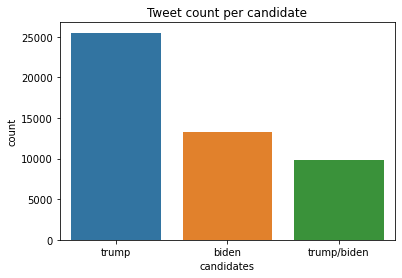

In [11]:
sns.countplot(tweets['candidates'],order=tweets['candidates'].value_counts().index);
plt.title('Tweet count per candidate');

The above countplot shows a very notable aspect of candidate Trump as a political figure. As it's known, Trump has a very strong digital political followers base, a result of its reliance upon social media to build his support, a chracteristic shown by the chart.

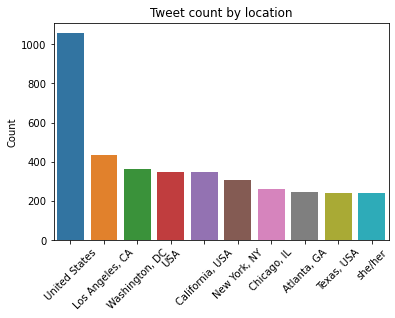

In [13]:
sns.barplot(x=tweets.user_location.value_counts().head(10).index,y=tweets.user_location.value_counts().head(10));
plt.title('Tweet count by location')
plt.xticks(rotation=45);
plt.ylabel('Count');

Here, we observe where most tweets come from. As imagined, most tweets are from USA itself, especially the cities of Los Angeles, Washington DC and New York. The identification of the location dependends, of course, on the users because many Twitter users do not exactly utilize the location spot correctly to identidy where they live as seen by the "she/her" in the chart or even those who only signalize their country as case of "USA" in fourth place in the chart.

In [14]:
n = tweets.groupby("candidates")['polarity','subjectivy'].agg([np.mean, np.std])
n

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


polarity           subjectivy          
                 mean       std       mean       std
candidates                                          
biden        0.019572  0.292628   0.284251  0.333612
trump        0.002443  0.296356   0.304710  0.338654
trump/biden  0.015927  0.292213   0.300569  0.333895

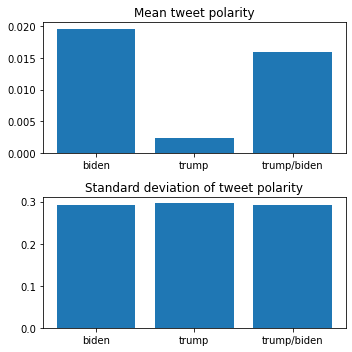

In [15]:
ps = tweets.groupby("candidates").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
ax0, ax1 = axes.flat

std = ps["polarity"]["std"]
mean = ps["polarity"]["mean"]

ax0.bar(mean.index.to_list(), mean)
ax0.set_title('Mean tweet polarity')

ax1.bar(std.index, std)
ax1.set_title('Standard deviation of tweet polarity')


plt.tight_layout()
plt.show()

I used the library `Text Blob` to realize the sentiment analysis of the tweets by measuring the polarity and the subjectivity of them. Polarity is the negativity or positivity of the tweet, on a -1 to 1 scale. Subjectivity is how objective or subjective the tweet is as 0 means that the tweet is very objective, and 1 means that it is very subjective. 

The result was not that expressive since the mean polarity of both candidates were below 0.1 and the standard deviations were around 0.3 on average. This indicates that we'd require other tools to realize a sentiment analysis that really present a more insightful conclusion.

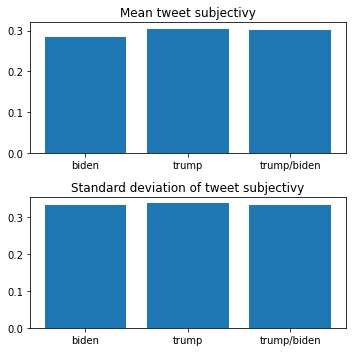

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
ax0, ax1 = axes.flat

std_s = ps["subjectivy"]["std"]
mean_s = ps["subjectivy"]["mean"]

ax0.bar(mean_s.index, mean_s)
ax0.set_title('Mean tweet subjectivy')

ax1.bar(std_s.index, std_s)
ax1.set_title('Standard deviation of tweet subjectivy')


plt.tight_layout()
plt.show()

In the other hand, we got a slightly different result in terms of subjectivy. We are able to see that the mean subjectivity for all the possible tweet alternative is 0.3 on average, what indicates the many tweets have a subjected weight as a result of the political option of the users. 

It is important to stress that the subjectity metric, like the polarity, has shortages in terms of analytic capacities, which also reinforces the need to apply other analysis tools.

In [17]:
def tweet_lenght(text):
    if len(text) <50:
        return "short"
    elif 50 <= len(text) <= 100:
        return 'medium'
    else:
        return 'long'

tweets['tweet_length'] = tweets['text'].apply(tweet_lenght)

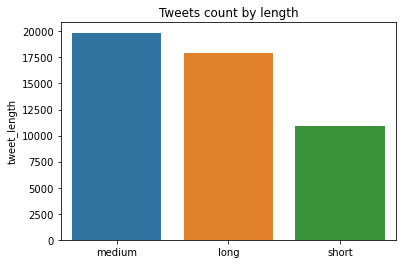

In [18]:
sns.barplot(y=tweets['tweet_length'].value_counts(),x=tweets['tweet_length'].unique()).set_title('Tweets count by length');

The majority of the extracteed tweets have medium and long legths. This points out that the political debate around the candidates generally envolves the formulation of slightly more extemsive opinions in terms of Twitter engagement. Now, let see how each candidate is related to the tweets' length.

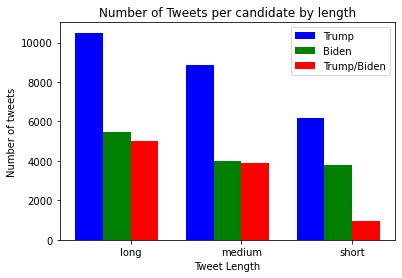

In [19]:
twl = {}
for candidate in tweets['candidates'].unique():
    twl[candidate] = tweets["tweet_length"][tweets["candidates"] == candidate].value_counts()
fig,ax=plt.subplots()
width = 0.5
x =np.array(range(0,6,2))
ax.bar(x, twl['trump'], width, color='b')
ax.bar(x+width, twl['biden'], width, color='g')
ax.bar(x + (width*2),twl['trump/biden'], width, color='r')

ax.set_ylabel('Number of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x+(width*1.5))
ax.set_xticklabels(['long', 'medium', "short"])
ax.set_xlabel('Tweet Length')
ax.legend(['Trump','Biden', 'Trump/Biden'])
plt.show()

As a result of Trump's digital predomance, it is comprehesible that he is the candidate that has the highest number of tweets for all tweet length categories.

### TF-IDF

Lastly, we take a look at TF-IDF to better analyse the words in the tweets. The TF-IDF (term frequency-inverse document frequency) measures how relevant a word is in a document in a collection of documents, which in our case are the tweets. This statistical measure is a result of the multiplication of the term frequency (the number of times a word appears in a document - tweet) and the inverse document frequency.

In [20]:
tfidf_transformer = TfidfVectorizer(stop_words='english')
tweets_tfidf = tfidf_transformer.fit_transform(tweets['text'])
indices = np.argsort(tfidf_transformer.idf_)
features = tfidf_transformer.get_feature_names()
top_features = [features[i] for i in indices[:15]]
idf =tfidf_transformer.idf_[indices]
df_idf = pd.DataFrame(data={'features':top_features,'idf':idf[:15]})
df_idf

,features,idf
0,trump,1.365452
1,biden,1.810725
2,https,2.398271
3,joe,3.442141
4,debates2020,3.450212
5,just,3.481930
6,debate,3.522854
7,like,3.828987
8,wallace,3.857227
9,shut,4.314494


Because of tecnical limitations and memory shortage, the `tf` values could not be calculated using the sklearn's CountVerctorizer() function. However, we still able to take some insights from the idf values alone. The `idf` is a metric of rarity throughout the collection of tweets, which means that the higher the idf, the fewer are the words occurrences (what might either mean that the word carries important information or it is irrelevant to the context).

In our case, besides the candidates' names and the words related to the debate themselves, we can observe that the words `cris` and `wallace` stand out. This is explainable because of the repercution of “Fox News Sunday” anchor and first-time presidential debate moderator Cris Wallace [losing control](https://nationalpost.com/news/world/a-terrible-missed-opportunity-chris-wallace-laments-losing-control-of-the-presidential-debate) over the debate.

Joao Pedro Vazquez 2020.

* [LinkedIn](https://www.linkedin.com/in/joao-pedro-vazquez/)
* [Github](https://github.com/jpvazquezz)